# 선형 SVM 분류

Support Vector Machine(SVM)은 원 훈련(또는 학습)데이터를 비선형 매핑(Mapping)을 통해 고차원으로 변환한다. 이 새로운 차원에서 초평면(hyperplane)을 최적으로 분리하는 선형분리를 찾는다. 즉, 최적의 Decision Boundary(의사결정 영역)를 찾는다. 

그렇다면 왜 데이터를 고차원으로 보내는 것일까? <br>
예를 들어, 아래의 [그림1]과 같이 A=[a, d], B=[b, c]는 2차원에서 non-linearly separable(비선형 분리)하다. 이를 통해 한 차원 높은 3차원으로 Mapping하게 되면 linearly separable(선형 분리)하게 된다. 따라서, 충분히 큰 차원으로 적절한 비선형 매핑을 이요하면, 두 개의 클래스를 가진 데이터는 초평면(hyperplane)에서 항상 분리될 수 있다.

SVM은 복잡한 비선형 의사결정 영역을 모형화 할 수 있기 때문에 매우 정확하며, 다른 모델들 보다 Over Fitting되는 경향이 적다.
<br>
<reference>
1. https://excelsior-cjh.tistory.com/66  <br>
2. https://ratsgo.github.io/machine%20learning/2017/05/23/SVM/ 

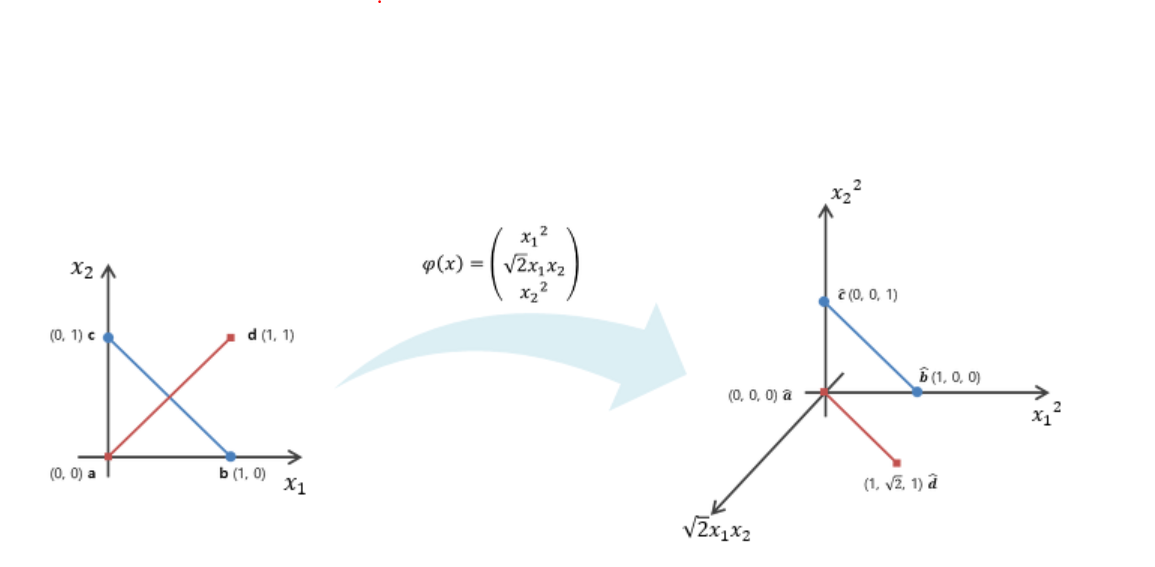

# 용어 정리


### 1. 초평면

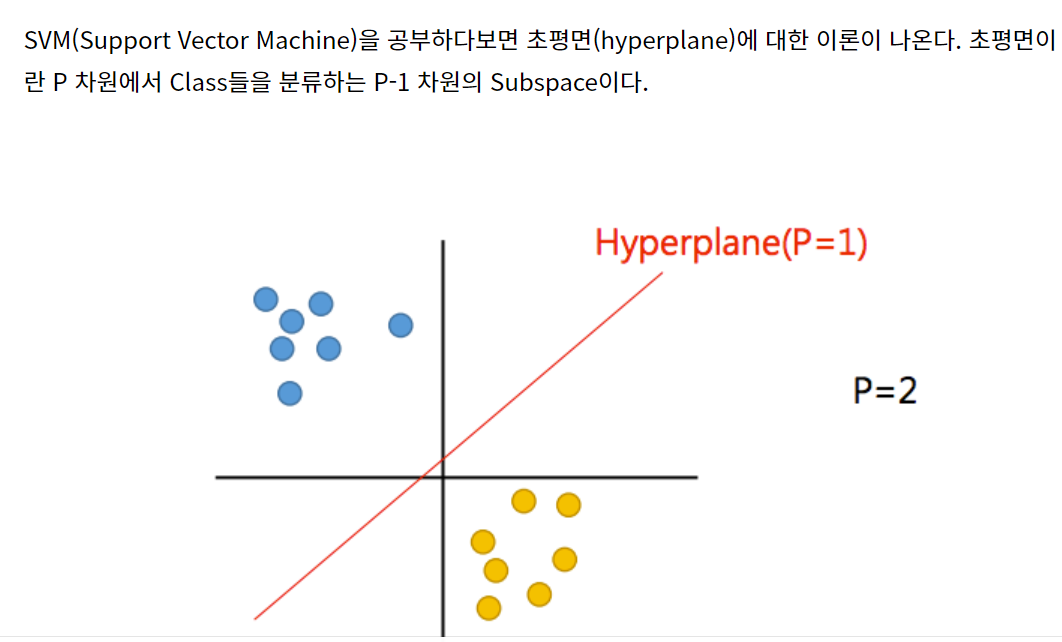

위의 그림과 같이 경계를 구분짓는 직선은 꼭 1개만 존재하는 것이 아니라 다양한 경우의 수가 있다. 그 중에서 둘을 가장 적절하게 구분할 수 있는 직선을 '최대 마진 분류기'라고 한다. 즉 학습 데이터 중에서 분류 경계에 가장 가까운 데이터로부터 분류 경계까지의 거리를 마진(Margin)이라고 하며, 이 마진을 최대로 만드는 것이 분류의 성능을 가장 높이는 것이다. 

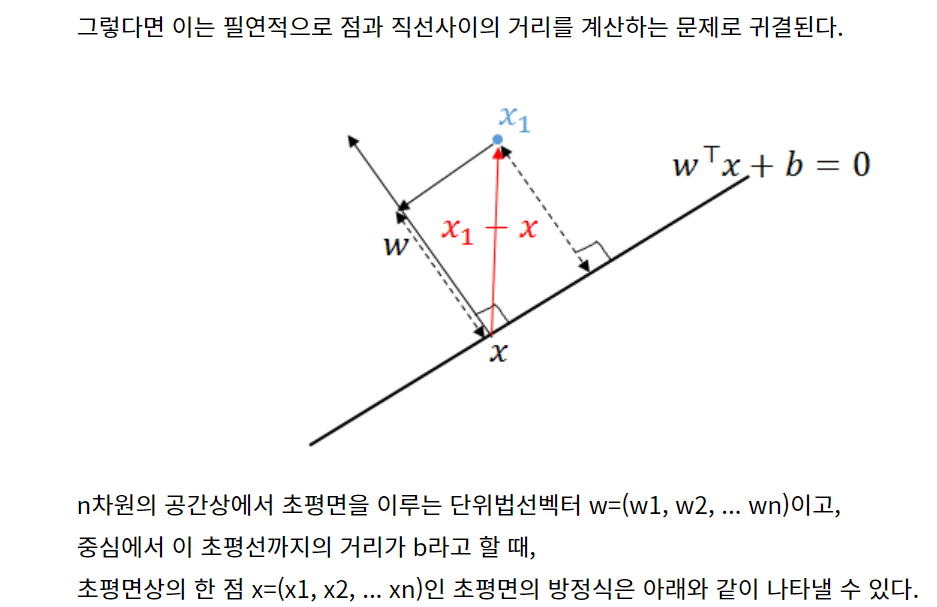

그렇다면 ,<br>
초평면상의 한 점 x=(x1, x2, ... xn)인 초평면의 방정식은 아래와 같이 나타낼 수 있다.<br>
<strong> (w1*x1)+(w2*x2)+...+(wn*xn)+b=0 </strong>
<br>
<br>
그리고 n차원 공간상의 임의의 점 A = (a1, a2, ... an)에서 이 초평면에 이르는 최소 거리(d)는 다음과 같이 구할 수 있다.<br>

<strong>d= ((w1*x1)+(w2*x2)+...+(wn*xn)+b)/SQRT(w1^2+w2^2+...+wn^2)</strong>

## 2. 마진

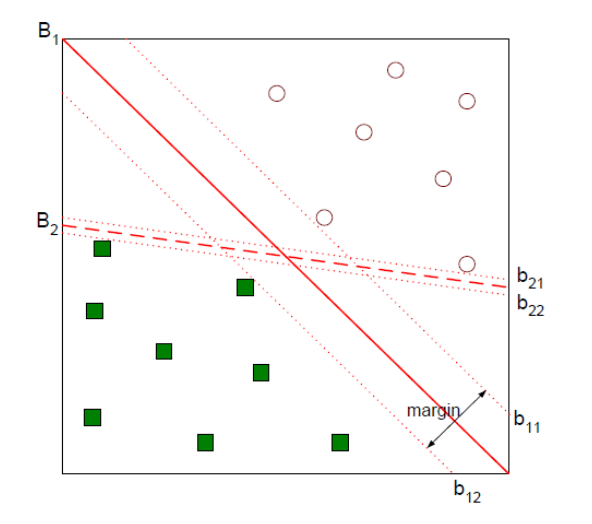

 위 그림에서 b12을 minus-plane, b11을 plus-plane, 이 둘 사이의 거리를 마진(margin)이라고 합니다.<br>
 SVM은 이 마진을 최대화하는 분류 경계면을 찾는 기법입니다. 이를 도식적으로 나타내면 아래와 같습니다.

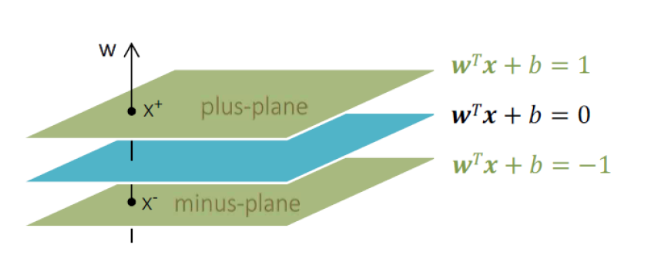

는 분류경계면을 wTx+b라고 둡시다. 그러면 벡터 w는 이 경계면과 수직인 법선벡터가 됩니다.<br>

이해하기 쉽도록 w를 2차원 벡터 (w1,w2)T라고 두겠습니다. w에 대해 원점과의 거리가 b인 직선의 방정식은 wTx+b=w1x1+w2x2+b=0이 됩니다. 이 직선의 기울기는 −w1/w2이고, 법선벡터 w의 기울기는 w2/w1이므로 두 직선은 수직입니다. 이를 차원을 확장하여 생각해도 마찬가지입니다.<br>

어쨌든 이 사실을 바탕으로 plus-plane 위에 있는 벡터 x+와 x− 사이의 관계를 다음과 같이 정의할 수 있습니다. x−를 w 방향으로 평행이동시키되 이동 폭은 λ로 스케일한다는 취지입니다.

plus lane: x+=x−+λw <br>
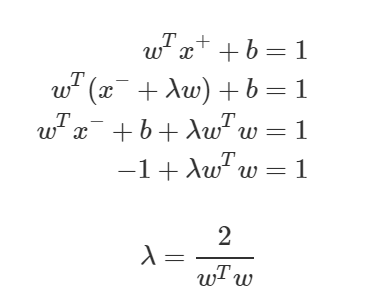

마진은 plus-plane과 minus-plane 사이의 거리를 의미합니다. 이는 x+와 x− 사이의 거리와 같습니다. 둘 사이의 관계식과 λ값을 알고 있으므로 식을 정리하면 마진을 다음과 같이 유도할 수 있습니다.

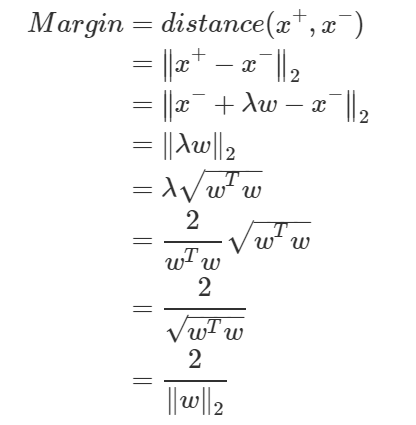

SVM의 목적은 마진을 최대화하는 경계면을 찾는 것입니다. 계산상 편의를 위해 마진 절반을 제곱한 것에 역수를 취한 뒤 그 절반을 최소화하는 문제로 바꾸겠습니다. 이렇게 해도 문제의 본질은 바뀌지 않습니다.

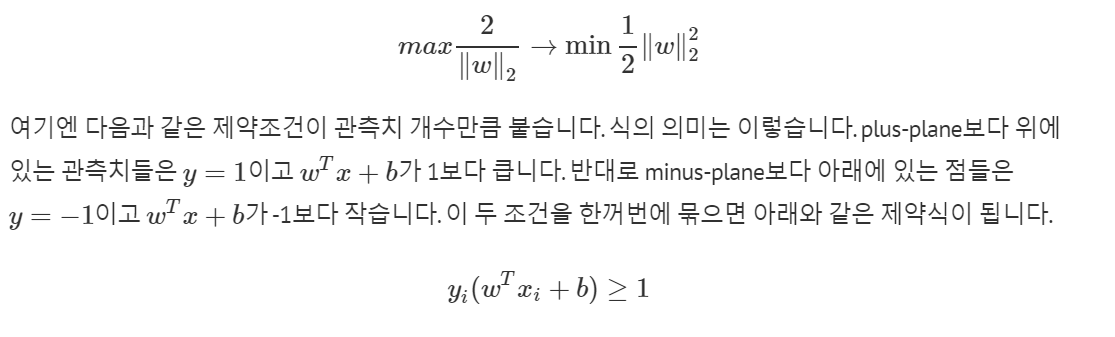

#### 제약식이 나온 과정

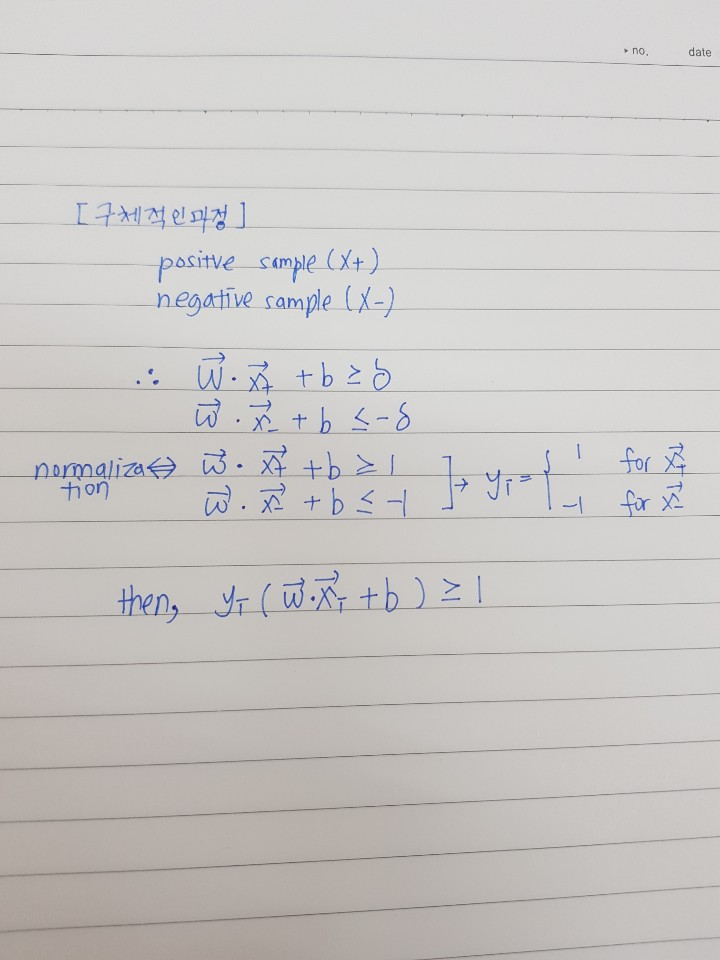


# 해결하기전, 알고가야할 개념

라그랑주 승수법에 대한 이해

랑주 승수법을 사용하는 방법은 목적 함수 f(x,y)와 제약 조건 g(x,y)=0에 대해 새로운 변수 λ를 이용하여 다음의 보조 방정식을 만든 다음, 보조방정식에 대해 모든 변수에 대한 편미분 값이 0이되는 변수의 해를 찾는 것이다.

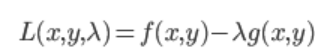

이렇게 목적 함수와 제약 조건에 대해 위와 같은 보조 방정식을 만들고 문제를 풀 수 있게 되는 이유는 제약 조건을 만족시키면서 목적 함수를 최대화 또는 최소화 시키는 점에서는 목적함수의 gradient(쉽게 말해 기울기)와 제약 조건의 gradient가 평행하기 때문이다. 아래의 그림을 보면서 조금 더 자세하게 알아보자.

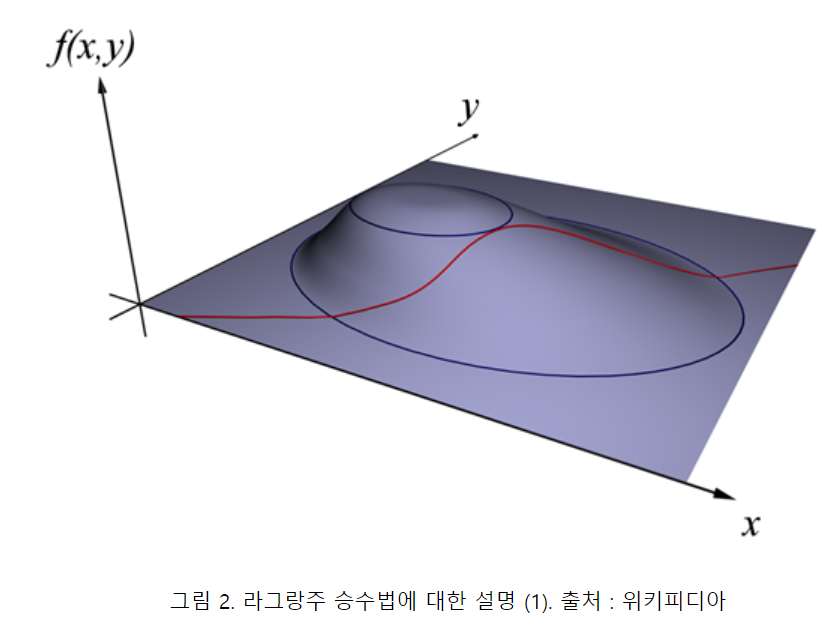

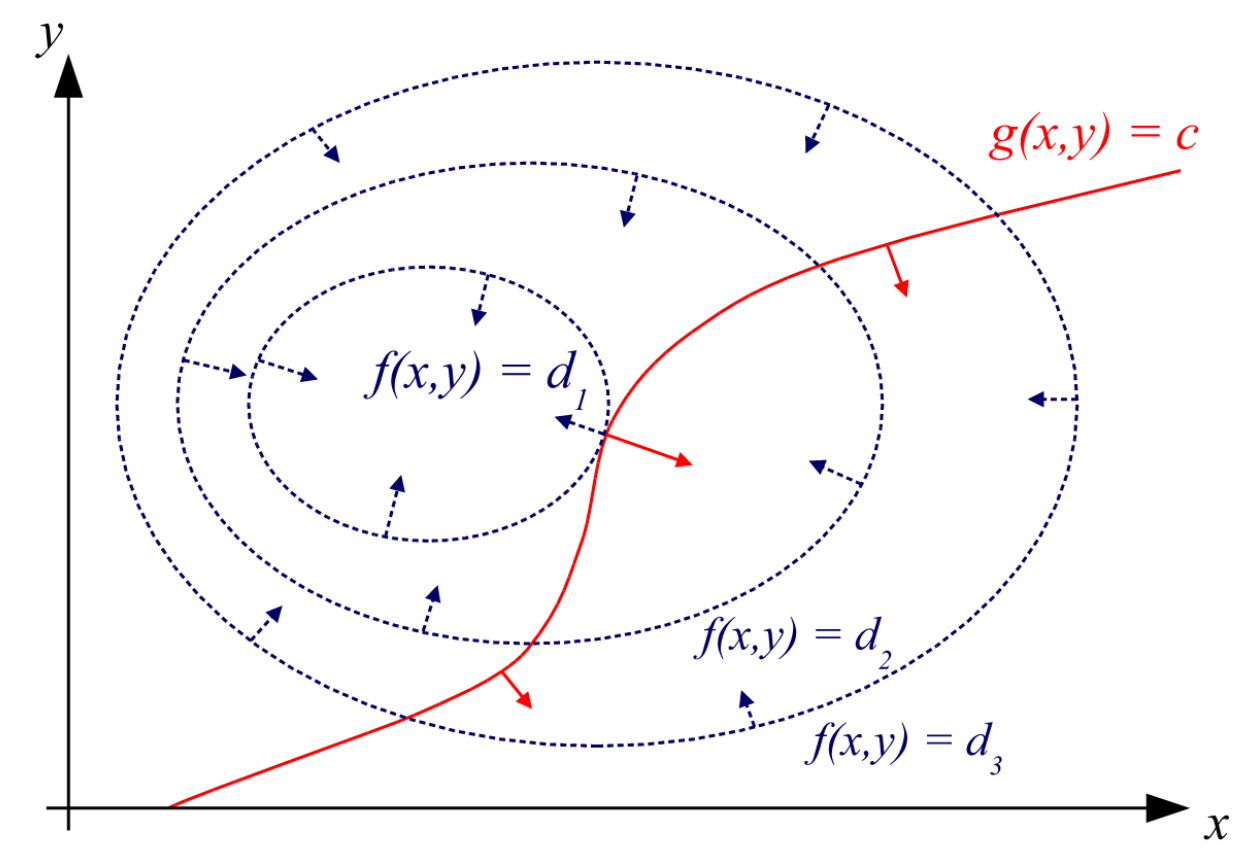

그림 2, 3에서 f(x,y)가 d1이라는 값에서부터 d3라는 값 까지 변할 수 있는데, g(x,y)=c라는 제약 조건이 붙었다고 하자. 그렇다면 g(x,y)=c라는 제약조건을 만족시키면서 f(x,y)가 커질 수 있는 최대값은 얼마일까? 물론 d1일 것이다.

그림 3을 유심히 관찰하면 f(x,y)와 g(x,y)=c가 접점을 이루는 곳이 제한된 조건을 만족하는 f(x,y)의 최대값이라는 것을 알 수 있다. 그렇다면 접점을 찾는 조건은 무엇일까? 바로 두 곡선의 기울기가 접점에서 평행을 이룬다는 사실이다. 곡선의 기울기는 미분을 통해 알 수 있는데 변수가 많아지면 편미분을 통해서, 조금더 자세하게는 gradient를 통해서 구할 수 있다. 즉, 접점의 값을 구하는 조건은 아래와 같다.



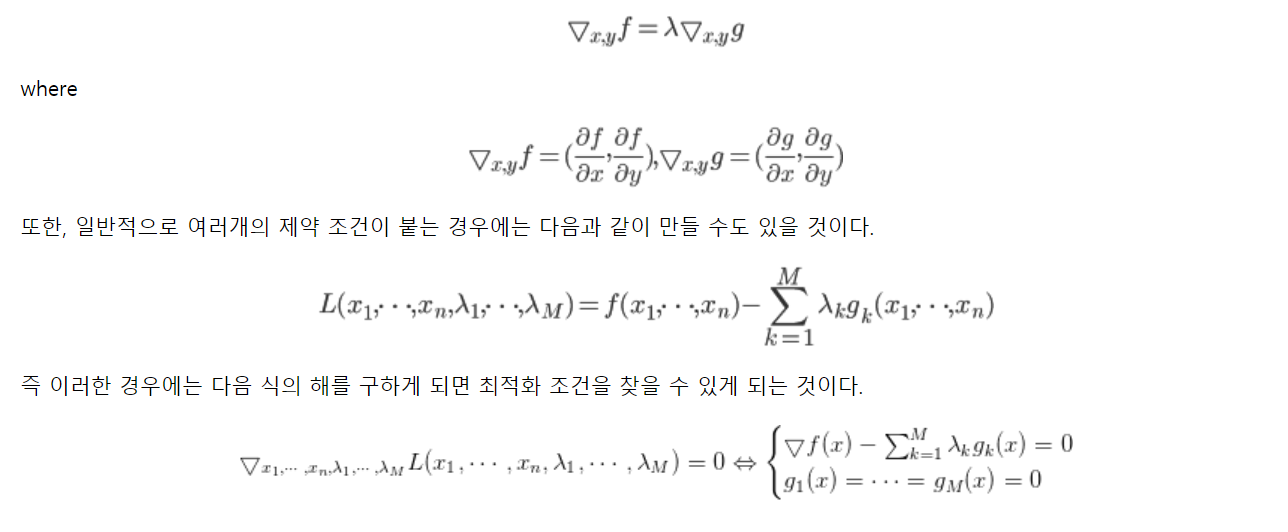